Importing Libraries

In [1]:
import pandas as pd
import numpy as np                     # For mathematical calculations
import seaborn as sns                  # For data visualization
import matplotlib.pyplot as plt        # For plotting graphs

import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import export_graphviz

Reading file 

In [2]:
db=pd.read_csv('dataset_part_1.csv')

In [3]:
db

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,Unknown,1.0,0,B0003,-80.577366,28.561857
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,Unknown,1.0,0,B0005,-80.577366,28.561857
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,Unknown,1.0,0,B0007,-80.577366,28.561857
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,Unknown,1.0,0,B1003,-120.610829,34.632093
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,Unknown,1.0,0,B1004,-80.577366,28.561857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,2020-09-03,Falcon 9,15600.000000,VLEO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1060,-80.603956,28.608058
86,87,2020-10-06,Falcon 9,15600.000000,VLEO,KSC LC 39A,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,13,B1058,-80.603956,28.608058
87,88,2020-10-18,Falcon 9,15600.000000,VLEO,KSC LC 39A,True ASDS,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1051,-80.603956,28.608058
88,89,2020-10-24,Falcon 9,15600.000000,VLEO,CCSFS SLC 40,True ASDS,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,12,B1060,-80.577366,28.561857


In [4]:
db.shape

(90, 17)

In [5]:
db.columns

Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs',
       'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude',
       'Latitude'],
      dtype='object')

In [6]:
db.dtypes

FlightNumber        int64
Date               object
BoosterVersion     object
PayloadMass       float64
Orbit              object
LaunchSite         object
Outcome            object
Flights             int64
GridFins             bool
Reused               bool
Legs                 bool
LandingPad         object
Block             float64
ReusedCount         int64
Serial             object
Longitude         float64
Latitude          float64
dtype: object

In [7]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FlightNumber    90 non-null     int64  
 1   Date            90 non-null     object 
 2   BoosterVersion  90 non-null     object 
 3   PayloadMass     90 non-null     float64
 4   Orbit           90 non-null     object 
 5   LaunchSite      90 non-null     object 
 6   Outcome         90 non-null     object 
 7   Flights         90 non-null     int64  
 8   GridFins        90 non-null     bool   
 9   Reused          90 non-null     bool   
 10  Legs            90 non-null     bool   
 11  LandingPad      90 non-null     object 
 12  Block           90 non-null     float64
 13  ReusedCount     90 non-null     int64  
 14  Serial          90 non-null     object 
 15  Longitude       90 non-null     float64
 16  Latitude        90 non-null     float64
dtypes: bool(3), float64(4), int64(3), obj

In [8]:
db['Outcome'].value_counts()

Outcome
True ASDS      41
None None      19
True RTLS      14
False ASDS      6
True Ocean      5
False Ocean     2
None ASDS       2
False RTLS      1
Name: count, dtype: int64

In [9]:
db['Orbit'].value_counts()

Orbit
GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
ES-L1     1
HEO       1
SO        1
GEO       1
Name: count, dtype: int64

Data Wrangling

In [10]:
landing_outcomes = db['Outcome'].value_counts()

In [11]:
for i,outcome in enumerate(landing_outcomes.keys()):
    print(i,outcome)

0 True ASDS
1 None None
2 True RTLS
3 False ASDS
4 True Ocean
5 False Ocean
6 None ASDS
7 False RTLS


In [12]:
bad_outcomes=set(landing_outcomes.keys()[[1,3,5,6,7]])
bad_outcomes

{'False ASDS', 'False Ocean', 'False RTLS', 'None ASDS', 'None None'}

In [13]:
landing_class = [0 if outcome in bad_outcomes else 1 for outcome in db['Outcome']]

In [14]:
print(landing_class)


[0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [15]:
db['Class']=landing_class
db[['Class']].head(8)

,Class
0,0
1,0
2,0
3,0
4,0
5,0
6,1
7,1


In [16]:
db.to_csv("dataset.csv", index=False)


In [17]:
db["Class"].mean()

0.6666666666666666

In [18]:
db=pd.read_csv('dataset.csv')

In [19]:
db

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,Unknown,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,Unknown,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,Unknown,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,Unknown,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,Unknown,1.0,0,B1004,-80.577366,28.561857,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,2020-09-03,Falcon 9,15600.000000,VLEO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1060,-80.603956,28.608058,1
86,87,2020-10-06,Falcon 9,15600.000000,VLEO,KSC LC 39A,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,13,B1058,-80.603956,28.608058,1
87,88,2020-10-18,Falcon 9,15600.000000,VLEO,KSC LC 39A,True ASDS,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1051,-80.603956,28.608058,1
88,89,2020-10-24,Falcon 9,15600.000000,VLEO,CCSFS SLC 40,True ASDS,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,12,B1060,-80.577366,28.561857,1


In [20]:
db.drop(db.columns[[0,1,2,6]], axis=1, inplace=True)

In [21]:
db

,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,6123.547647,LEO,CCSFS SLC 40,1,False,False,False,Unknown,1.0,0,B0003,-80.577366,28.561857,0
1,525.000000,LEO,CCSFS SLC 40,1,False,False,False,Unknown,1.0,0,B0005,-80.577366,28.561857,0
2,677.000000,ISS,CCSFS SLC 40,1,False,False,False,Unknown,1.0,0,B0007,-80.577366,28.561857,0
3,500.000000,PO,VAFB SLC 4E,1,False,False,False,Unknown,1.0,0,B1003,-120.610829,34.632093,0
4,3170.000000,GTO,CCSFS SLC 40,1,False,False,False,Unknown,1.0,0,B1004,-80.577366,28.561857,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,15600.000000,VLEO,KSC LC 39A,2,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1060,-80.603956,28.608058,1
86,15600.000000,VLEO,KSC LC 39A,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,13,B1058,-80.603956,28.608058,1
87,15600.000000,VLEO,KSC LC 39A,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1051,-80.603956,28.608058,1
88,15600.000000,VLEO,CCSFS SLC 40,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,12,B1060,-80.577366,28.561857,1


In [22]:
db.drop(db.columns[[10,11,12]], axis=1, inplace=True)

In [23]:
db

,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Class
0,6123.547647,LEO,CCSFS SLC 40,1,False,False,False,Unknown,1.0,0,0
1,525.000000,LEO,CCSFS SLC 40,1,False,False,False,Unknown,1.0,0,0
2,677.000000,ISS,CCSFS SLC 40,1,False,False,False,Unknown,1.0,0,0
3,500.000000,PO,VAFB SLC 4E,1,False,False,False,Unknown,1.0,0,0
4,3170.000000,GTO,CCSFS SLC 40,1,False,False,False,Unknown,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
85,15600.000000,VLEO,KSC LC 39A,2,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,1
86,15600.000000,VLEO,KSC LC 39A,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,13,1
87,15600.000000,VLEO,KSC LC 39A,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,1
88,15600.000000,VLEO,CCSFS SLC 40,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,12,1


In [24]:
db = pd.get_dummies(db, columns =['Orbit','LaunchSite','LandingPad'])

In [25]:
l_status = LabelEncoder()
db['GridFins'] = l_status.fit_transform(db.GridFins)
db['Reused'] = l_status.fit_transform(db.Reused)
db['Legs'] = l_status.fit_transform(db.Legs)

In [26]:
db

,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Class,Orbit_ES-L1,Orbit_GEO,...,Orbit_VLEO,LaunchSite_CCSFS SLC 40,LaunchSite_KSC LC 39A,LaunchSite_VAFB SLC 4E,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3032383ecb761634e7cb,LandingPad_5e9e3033383ecbb9e534e7cc,LandingPad_Unknown
0,6123.547647,1,0,0,0,1.0,0,0,False,False,...,False,True,False,False,False,False,False,False,False,True
1,525.000000,1,0,0,0,1.0,0,0,False,False,...,False,True,False,False,False,False,False,False,False,True
2,677.000000,1,0,0,0,1.0,0,0,False,False,...,False,True,False,False,False,False,False,False,False,True
3,500.000000,1,0,0,0,1.0,0,0,False,False,...,False,False,False,True,False,False,False,False,False,True
4,3170.000000,1,0,0,0,1.0,0,0,False,False,...,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,15600.000000,2,1,1,1,5.0,12,1,False,False,...,True,False,True,False,False,False,True,False,False,False
86,15600.000000,3,1,1,1,5.0,13,1,False,False,...,True,False,True,False,False,False,True,False,False,False
87,15600.000000,6,1,1,1,5.0,12,1,False,False,...,True,False,True,False,False,False,True,False,False,False
88,15600.000000,3,1,1,1,5.0,12,1,False,False,...,True,True,False,False,False,False,False,False,True,False


EDA

<Axes: xlabel='Flights', ylabel='count'>

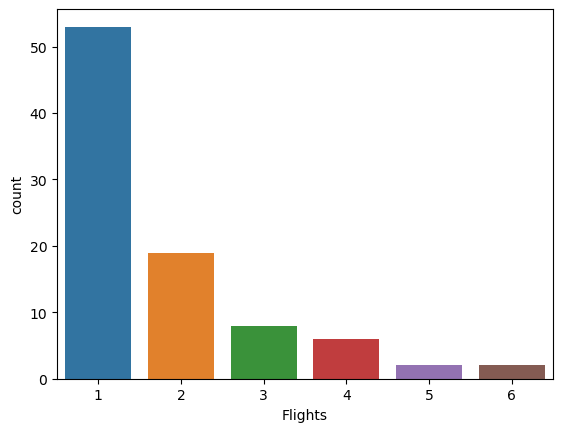

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x ='Flights', data = db)


<Axes: xlabel='GridFins', ylabel='count'>

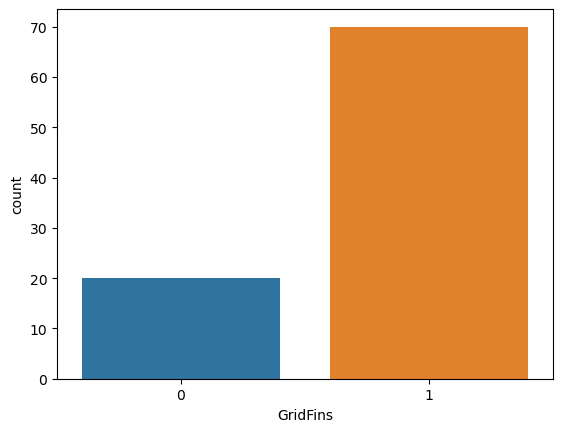

In [28]:
sns.countplot(x ='GridFins', data = db)

<Axes: xlabel='Reused', ylabel='count'>

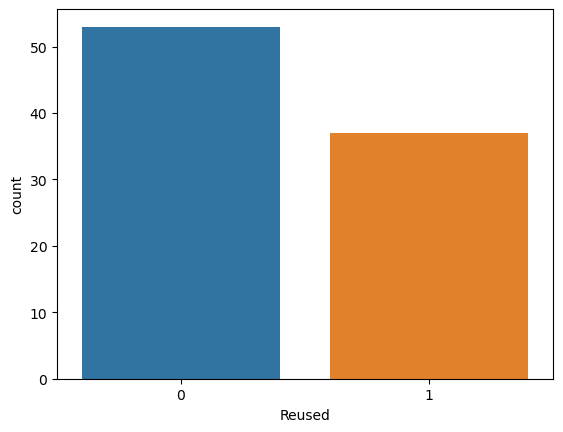

In [29]:
sns.countplot(x ='Reused', data = db)

<Axes: xlabel='PayloadMass', ylabel='Density'>

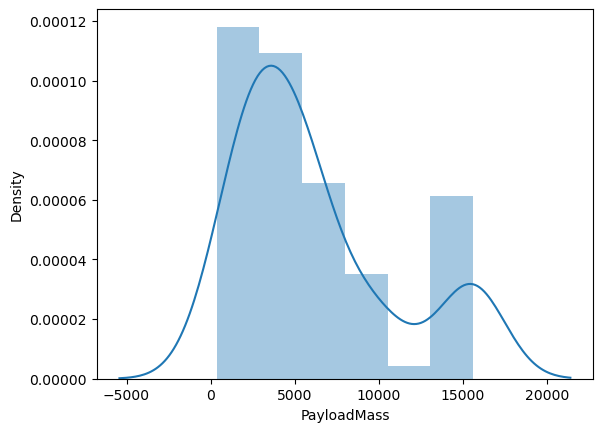

In [30]:
sns.distplot(db['PayloadMass'])

<Axes: xlabel='Block', ylabel='Count'>

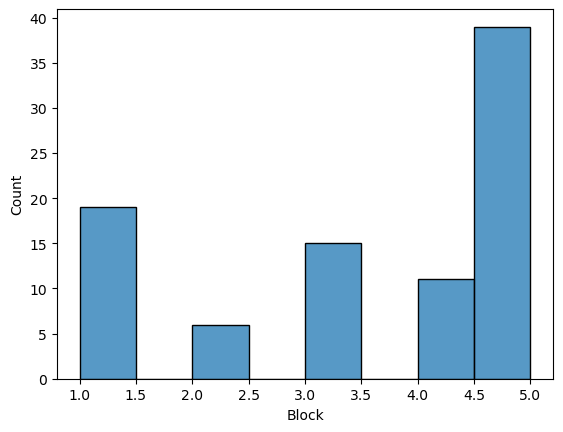

In [31]:
sns.histplot(db['Block'])

<Axes: xlabel='ReusedCount', ylabel='Density'>

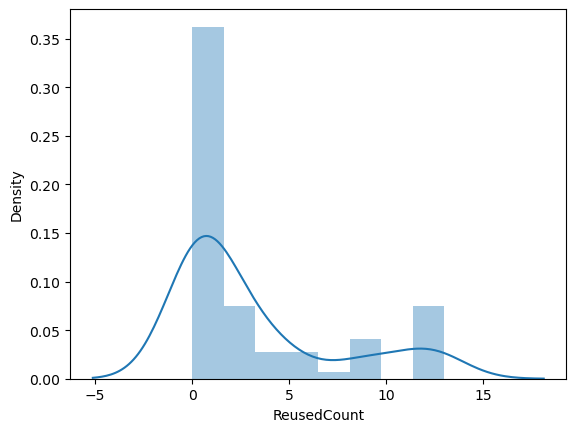

In [32]:
sns.distplot(db['ReusedCount'])

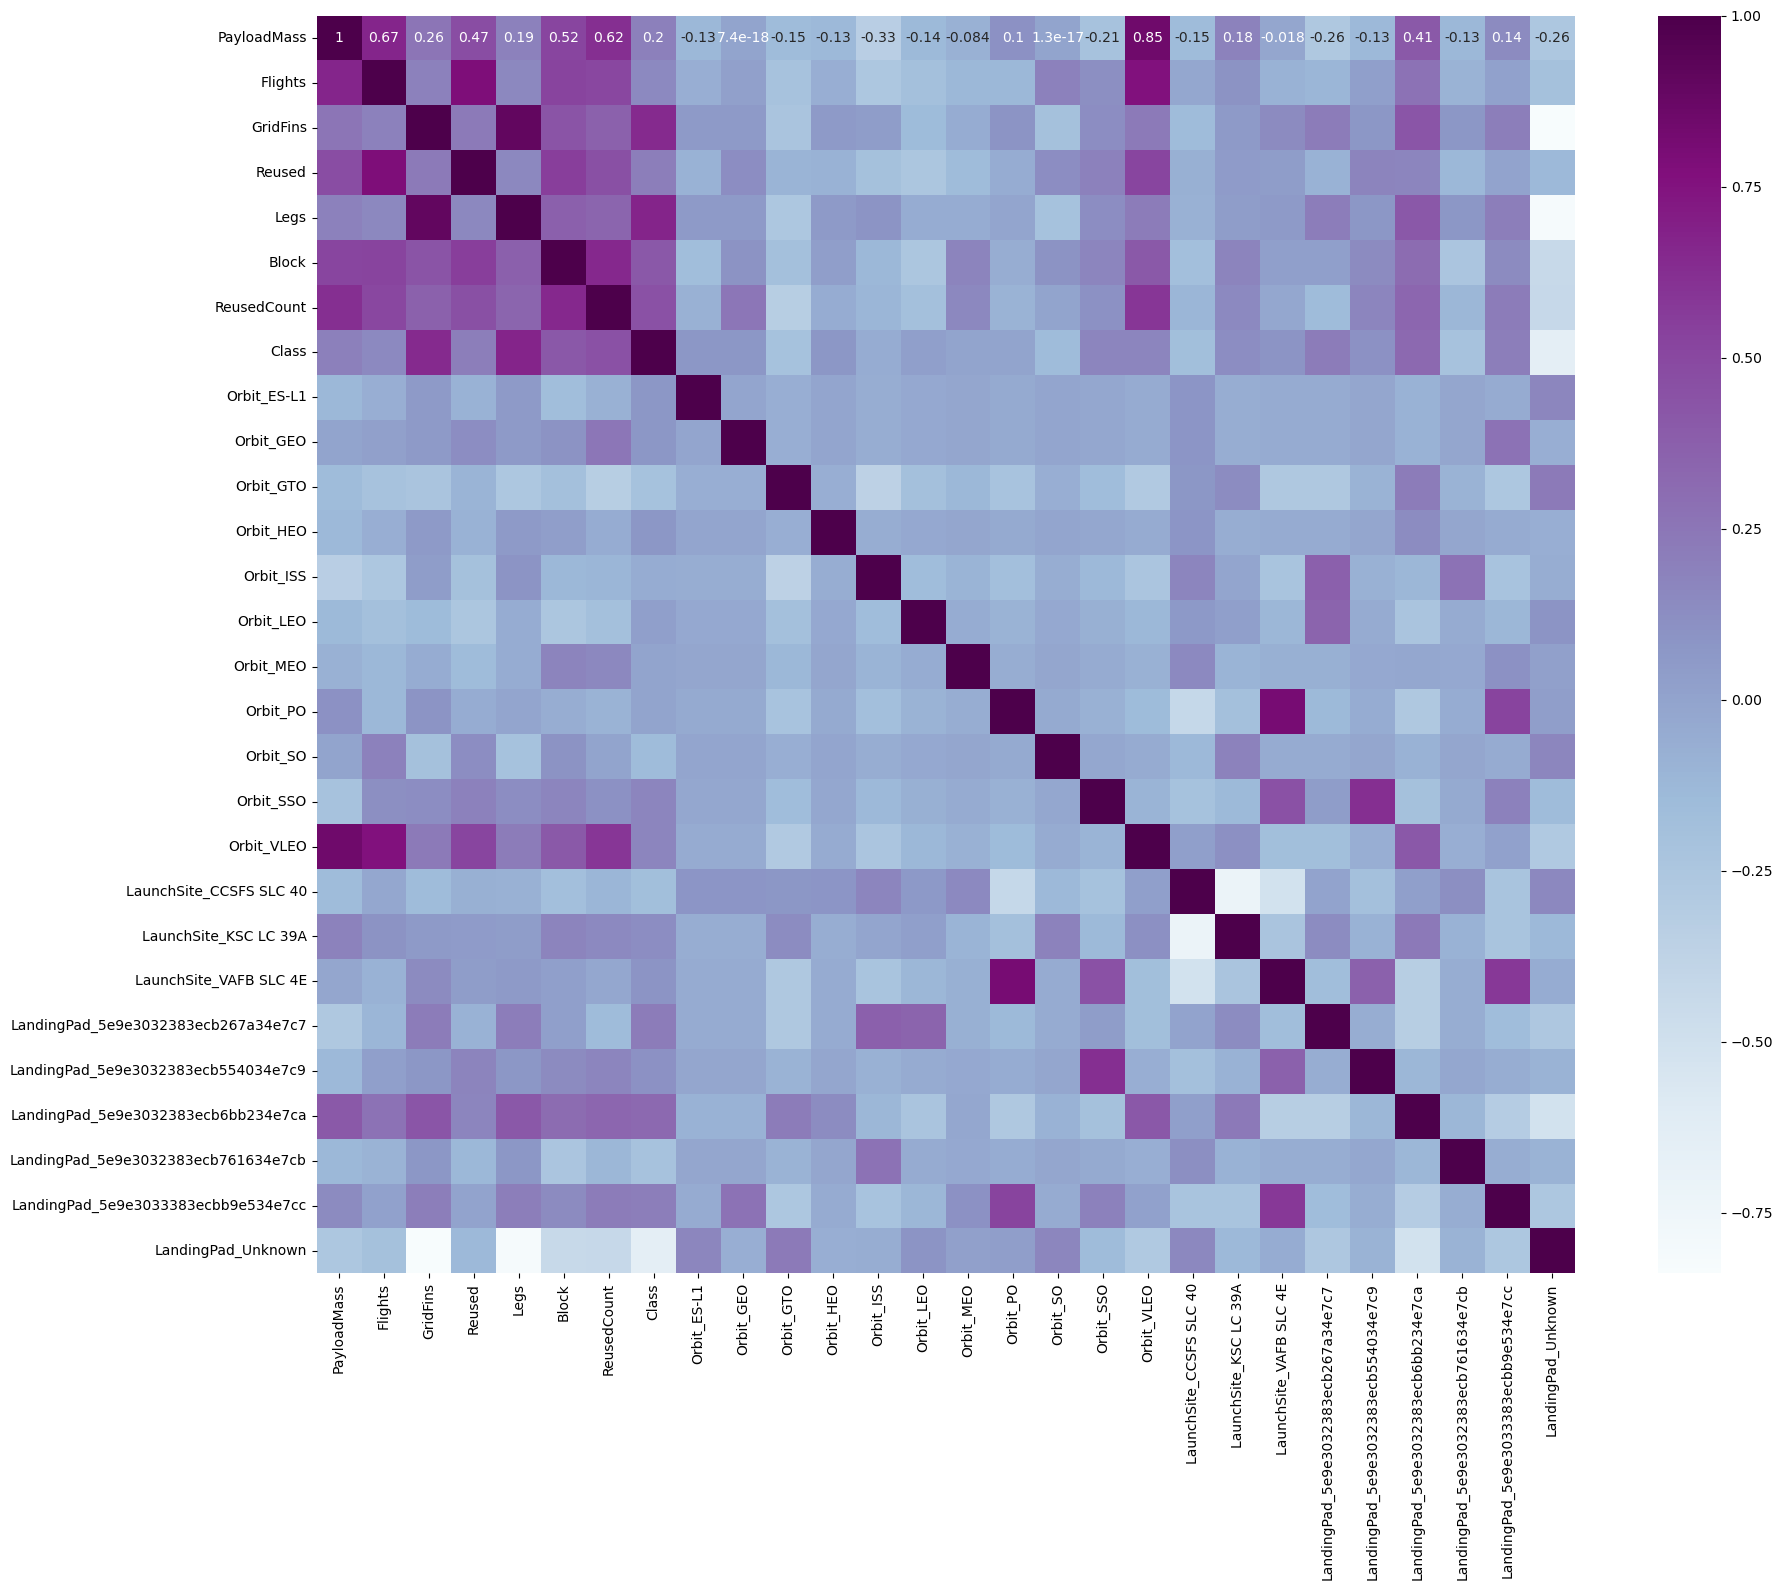

In [33]:
plt.figure(figsize=(20, 16))
sns.heatmap(db.corr(),annot=True, cmap="BuPu", square=True )
plt.tight_layout()
plt.show()

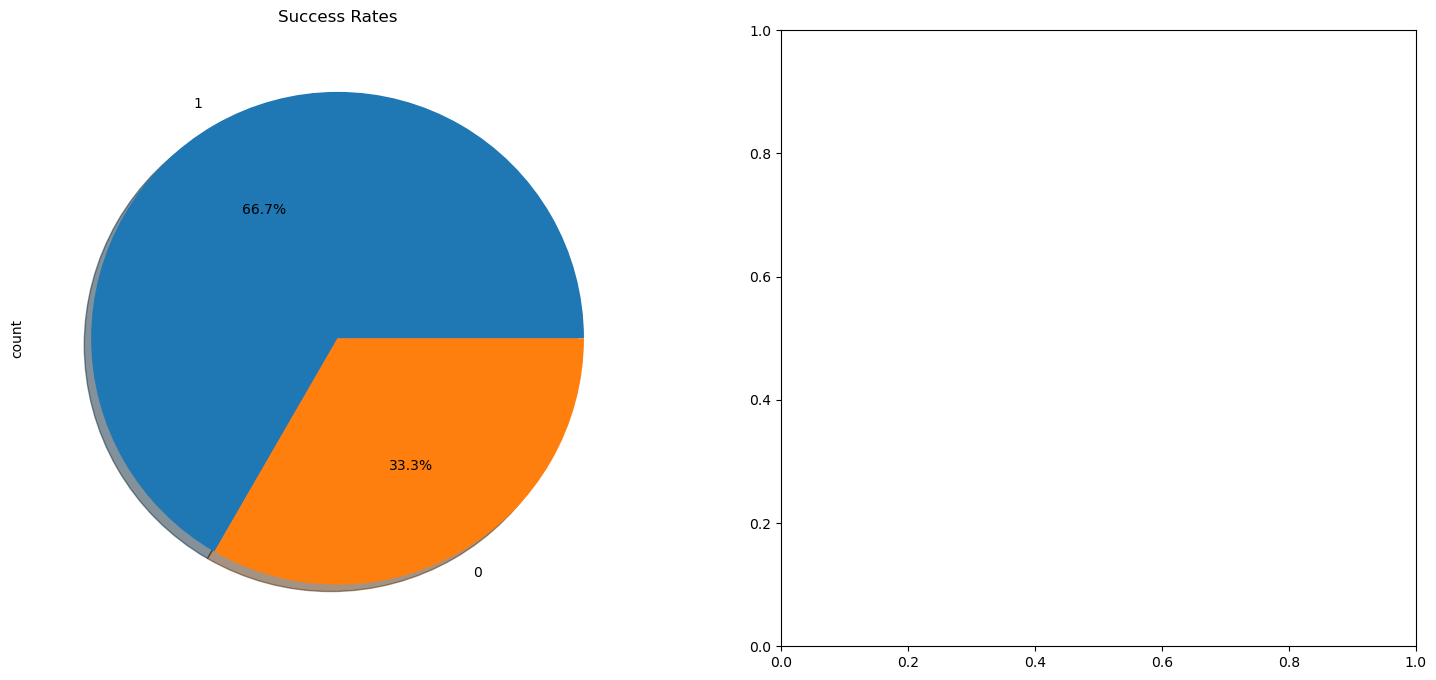

In [34]:
f,ax=plt.subplots(1,2,figsize=(18,8))

ax[0] = db['Class'].value_counts().plot.pie(explode=[0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Success Rates')

plt.show()

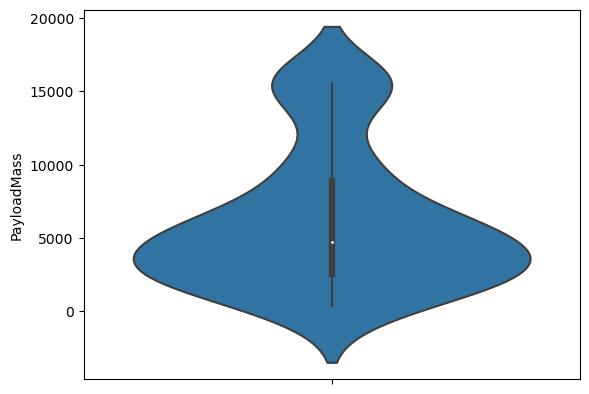

In [35]:
sns.violinplot(data=db, y='PayloadMass')
plt.show()

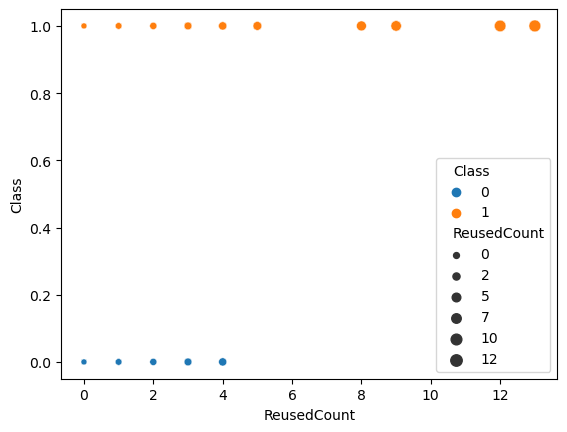

In [36]:
sns.scatterplot(data=db, x='ReusedCount', y='Class', size='ReusedCount', hue='Class')

# Show the plot
plt.show()

In [37]:
import sqlite3
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('db.sqlite')
cursor = conn.cursor()

# Execute SQL query to retrieve data
query = "SELECT category, SUM(amount) FROM transactions GROUP BY category"
cursor.execute(query)

# Fetch the data
data = cursor.fetchall()

# Close the cursor and connection
cursor.close()
conn.close()

# Process the fetched data
categories = [row[0] for row in data]
amounts = [row[1] for row in data]

# Create a bar chart
plt.bar(categories, amounts)
plt.xlabel('Category')
plt.ylabel('Total Amount')
plt.title('Total Amount by Category')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


OperationalError: no such table: transactions

In [ ]:
sns.jointplot(data=db, x='PayloadMass', y='ReusedCount', kind='hex')
plt.figure(figsize=(10, 8))
# Show the plot
plt.xlabel('Payload Mass')
plt.ylabel('Reused Count')
plt.title('Relation between Payload Mass and Reused Count')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Mean Payload Mass by Class')

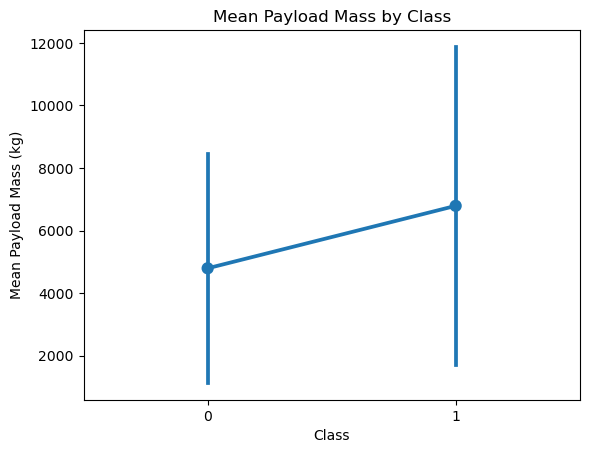

In [38]:
sns.pointplot(data=db, x='Class', y='PayloadMass', ci='sd')

# Add labels and title
plt.xlabel('Class')
plt.ylabel('Mean Payload Mass (kg)')
plt.title('Mean Payload Mass by Class')

# Show the plot

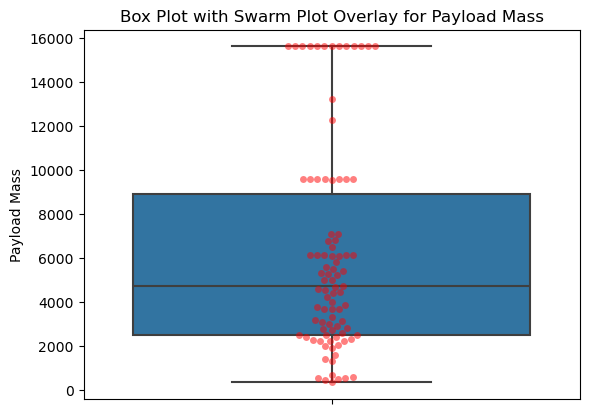

In [39]:
sns.boxplot(data=db, y='PayloadMass')
sns.swarmplot(data=db, y='PayloadMass', color='red', alpha=0.5)

# Add labels and title
plt.ylabel('Payload Mass')
plt.title('Box Plot with Swarm Plot Overlay for Payload Mass')

# Show the plot
plt.show()

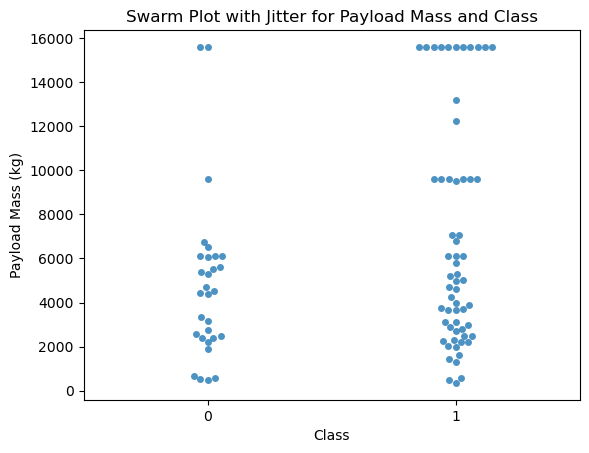

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a swarm plot with jitter
sns.swarmplot(data=db, x='Class', y='PayloadMass', dodge=True, alpha=0.8)

# Add labels and title
plt.xlabel('Class')
plt.ylabel('Payload Mass (kg)')
plt.title('Swarm Plot with Jitter for Payload Mass and Class')

# Show the plot
plt.show()


TRAIN TEST SPLIT

In [41]:
X = db.loc[:, db.columns != 'Class']
Y = db.loc[:, db.columns == 'Class']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

MODELS

In [43]:
clf = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth = 5, min_samples_leaf = 5)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5,
                       random_state=100)

In [44]:
y_pred = clf.predict(X_test)

In [45]:
a=accuracy_score(y_test,y_pred)*100
print(a)

83.33333333333334


In [47]:
from sklearn.ensemble import RandomForestClassifier


rfc = RandomForestClassifier(n_estimators=100, random_state=0)

rfc.fit(X_train, y_train)

y_pred_100 = rfc.predict(X_test)

In [48]:
b=accuracy_score(y_test,y_pred_100)*100
b

88.88888888888889

In [49]:
from sklearn.linear_model import LogisticRegression
import warnings

log_reg = LogisticRegression().fit(X_train, y_train)

y_pred_log = log_reg.predict(X_test)

In [50]:
c=accuracy_score(y_test,y_pred_log)*100
c

83.33333333333334

In [58]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_100)

cm

array([[ 4,  0],
       [ 2, 12]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix')

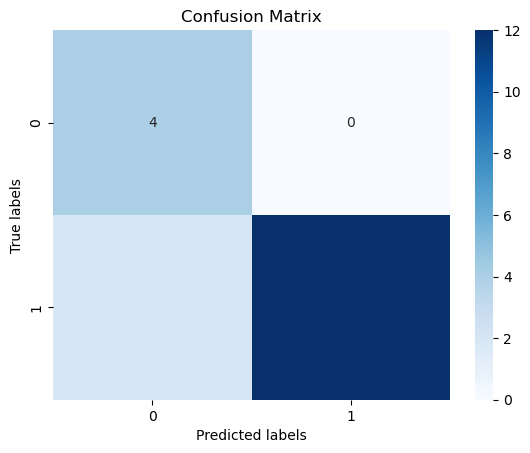

In [61]:
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# Add labels and title
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

In [63]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred_100)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         4
           1       1.00      0.86      0.92        14

    accuracy                           0.89        18
   macro avg       0.83      0.93      0.86        18
weighted avg       0.93      0.89      0.90        18



In [51]:
feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

ReusedCount                            0.182167
LandingPad_Unknown                     0.162196
Legs                                   0.140511
PayloadMass                            0.095771
GridFins                               0.083898
Block                                  0.083069
LandingPad_5e9e3032383ecb6bb234e7ca    0.036048
Flights                                0.034790
LandingPad_5e9e3032383ecb761634e7cb    0.024356
Orbit_GTO                              0.021819
LaunchSite_CCSFS SLC 40                0.018081
LandingPad_5e9e3032383ecb267a34e7c7    0.017181
Orbit_ISS                              0.016660
LandingPad_5e9e3033383ecbb9e534e7cc    0.013704
Orbit_LEO                              0.012796
Reused                                 0.011623
LaunchSite_VAFB SLC 4E                 0.011451
Orbit_PO                               0.008813
Orbit_VLEO                             0.008327
LaunchSite_KSC LC 39A                  0.007733
Orbit_SSO                              0

In [67]:
#RFC IS THE BEST MODEL!

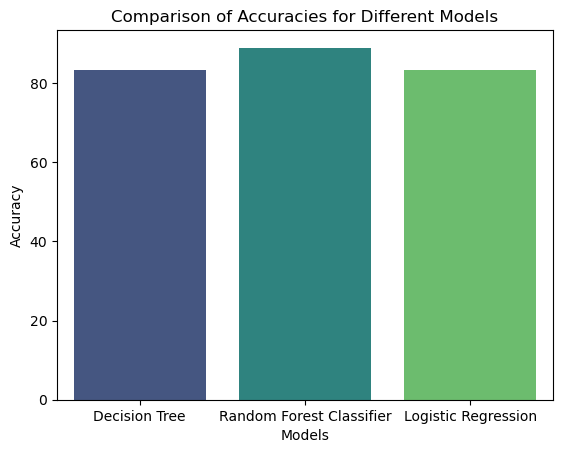

In [52]:
models = ['Decision Tree', 'Random Forest Classifier', 'Logistic Regression']
accuracies = [a, b, c]  # Replace a, b, c with the actual accuracies

# Create a bar plot
sns.barplot(x=models, y=accuracies, palette='viridis')

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracies for Different Models')

# Show plot
plt.show()

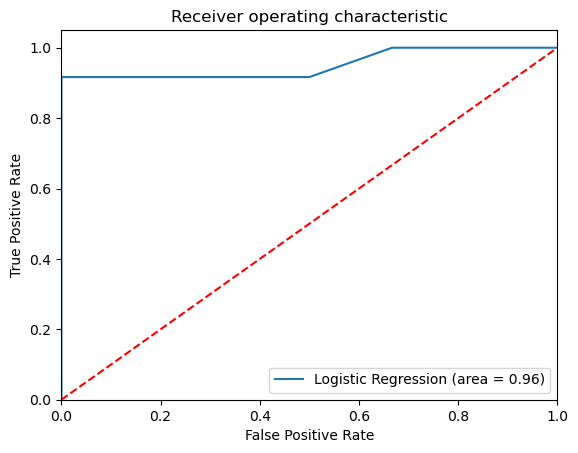

In [53]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_pred_100, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_pred_100, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

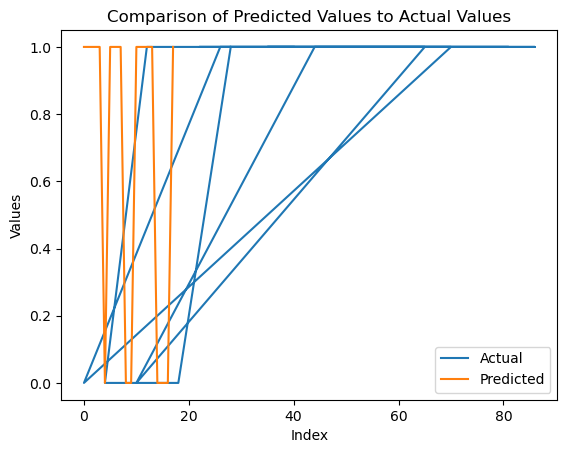

In [54]:
# Create the line plot
plt.plot(y_test, label='Actual')
plt.plot(y_pred_100, label='Predicted')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Comparison of Predicted Values to Actual Values')
plt.legend()

# Show the plot
plt.show()

END OF PROJECT